In [77]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [78]:
from sklearn import datasets
iris = datasets.load_iris()

In [79]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [80]:
iris = pd.DataFrame(
    data= np.c_[iris['data'], iris['target']],
    columns= iris['feature_names'] + ['target']
    )

In [81]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [82]:
species = []

for i in range(len(iris['target'])):
    if iris['target'][i] == 0:
        species.append("setosa")
    elif iris['target'][i] == 1:
        species.append('versicolor')
    else:
        species.append('virginica')


iris['species'] = species

In [83]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


In [84]:
iris.groupby('species').size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

In [85]:
iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [86]:
from sklearn.model_selection import train_test_split

In [87]:
# Droping the target and species since we only need the measurements
X = iris.drop(['target','species'], axis=1)

# converting into numpy array and assigning petal length and petal width
X = X.to_numpy()[:, (2,3)]
y = iris['target']

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5, random_state=42)

In [89]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

In [90]:
from sklearn.decomposition import PCA

In [91]:
pca = PCA(n_components = 2)

In [92]:
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)

In [93]:
explained_varience = pca.explained_variance_ratio_
explained_varience

array([0.98504106, 0.01495894])

In [94]:
from sklearn.linear_model import LogisticRegression

In [95]:
classifier_PCA = LogisticRegression(random_state = 42)
classifier_PCA.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [96]:
y_pred = classifier_PCA.predict(X_test)
y_pred

array([1., 2., 0., 1., 1., 2., 1., 0., 1., 1., 0., 2., 2., 2., 2., 1., 0.,
       1., 1., 0., 2., 0., 2., 0., 0., 0., 0., 0., 2., 2., 2., 2., 1., 2.,
       2., 0., 1., 2., 2., 2., 0., 1., 1., 2., 2., 1., 1., 0., 1., 0., 1.,
       0., 1., 2., 0., 1., 2., 2., 2., 1., 0., 2., 2., 2., 1., 2., 1., 0.,
       2., 1., 0., 2., 0., 0., 1.])

In [97]:
from sklearn.metrics import confusion_matrix

In [98]:
confusion_matric = confusion_matrix(y_test, y_pred)
confusion_matric

array([[ 0,  0, 29],
       [ 0, 23,  0],
       [22,  1,  0]], dtype=int64)

In [99]:
from matplotlib.colors import ListedColormap

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


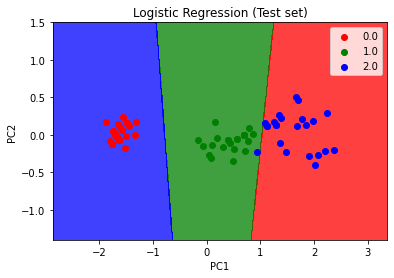

In [100]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier_PCA.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

# LDA

In [38]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [101]:
classifier_LDA = LogisticRegression(random_state = 42)
classifier_LDA.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [102]:
lda = LDA(n_components = 2)

In [103]:
X_test = lda.fit_transform(X_test, y_test)

In [41]:
from sklearn.linear_model import LogisticRegression

In [104]:
classifier_LDA.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [105]:
y_pred = classifier_LDA.predict(X_test)

In [106]:
from sklearn.metrics import confusion_matrix
confusion_matric = confusion_matrix(y_test, y_pred)
confusion_matric

array([[ 0,  0, 29],
       [16,  7,  0],
       [23,  0,  0]], dtype=int64)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


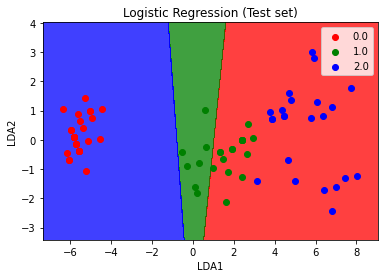

In [107]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier_LDA.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('LDA1')
plt.ylabel('LDA2')
plt.legend()
plt.show()